Project 2: Classification
By: Veer Pothapragada

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(train_df.head())


   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  


In [2]:
# Converts "Class Index" column into nderstandable values instead of 1-4

label_map = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
train_df['label'] = train_df['Class Index'].map(label_map)
test_df['label'] = test_df['Class Index'].map(label_map)

In [3]:
# Combines Title and Description into one text field
train_df['text'] = train_df['Title'] + " " + train_df['Description']
test_df['text'] = test_df['Title'] + " " + test_df['Description']

X_train, y_train = train_df['text'], train_df['label']
X_test, y_test = test_df['text'], test_df['label']

In [4]:
print(train_df.head())

   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description     label  \
0  Reuters - Short-sellers, Wall Street's dwindli...  Business   
1  Reuters - Private investment firm Carlyle Grou...  Business   
2  Reuters - Soaring crude prices plus worries\ab...  Business   
3  Reuters - Authorities have halted oil export\f...  Business   
4  AFP - Tearaway world oil prices, toppling reco...  Business   

                                                text  
0  Wall St. Bears Claw Back Into the Black (Reute...  
1  Carlyle Looks Toward Commercial Aerospace (Reu...  
2  Oil and Economy Clou

In [5]:
# This is for pre-modeing visualizations

full_df = pd.concat([train_df, test_df], axis=0)

full_df['desc_length'] = full_df['Description'].apply(lambda x: len(str(x).split()))


Pre-Modeling Visualization #1: Bar Graph

/var/folders/_f/fmfry0h146q34wf_0v7085kh0000gn/T/ipykernel_3229/2867005887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=full_df, x="label", order=full_df['label'].value_counts().index, palette="Set2")


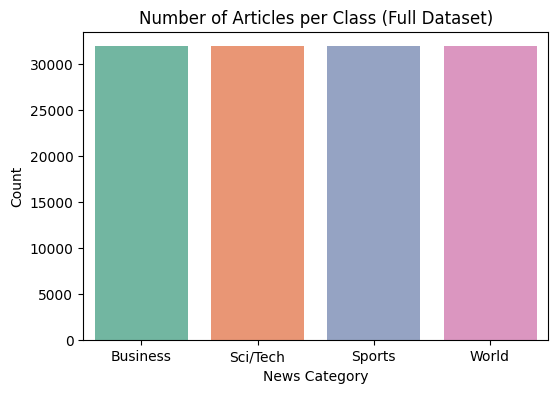

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=full_df, x="label", order=full_df['label'].value_counts().index, palette="Set2")
plt.title("Number of Articles per Class (Full Dataset)")
plt.xlabel("News Category")
plt.ylabel("Count")
plt.show()

Pre-Modeling Visualization #2: Histogram

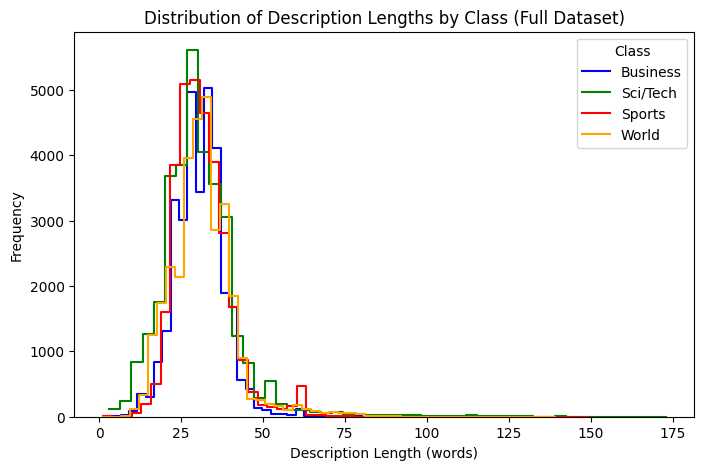

In [7]:
plt.figure(figsize=(8,5))

# Plot each class separately as an outline histogram
classes = full_df['label'].unique()
colors = ['blue', 'green', 'red', 'orange']

for cls, color in zip(classes, colors):
    subset = full_df[full_df['label'] == cls]
    sns.histplot(subset['desc_length'], bins=50, element="step", 
                 fill=False, color=color, label=cls)

plt.title("Distribution of Description Lengths by Class (Full Dataset)")
plt.xlabel("Description Length (words)")
plt.ylabel("Frequency")
plt.legend(title="Class")
plt.show()


Model 1: Naive Bayes Model

In [8]:
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('nb', MultinomialNB())
])

# Train
nb_pipeline.fit(X_train, y_train)

# Predict
y_pred_nb = nb_pipeline.predict(X_test)

# Evaluate
print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=label_map.values()))

Naive Bayes Results:
Accuracy: 0.8919736842105264
              precision    recall  f1-score   support

       World       0.86      0.84      0.85      1900
      Sports       0.86      0.86      0.86      1900
    Business       0.94      0.97      0.96      1900
    Sci/Tech       0.90      0.89      0.90      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



Model 2: Random Forest 

In [9]:
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

# Train
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_map.values()))

Random Forest Results:
Accuracy: 0.8867105263157895
              precision    recall  f1-score   support

       World       0.86      0.84      0.85      1900
      Sports       0.86      0.86      0.86      1900
    Business       0.91      0.96      0.94      1900
    Sci/Tech       0.91      0.89      0.90      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



Confusion Matrix 

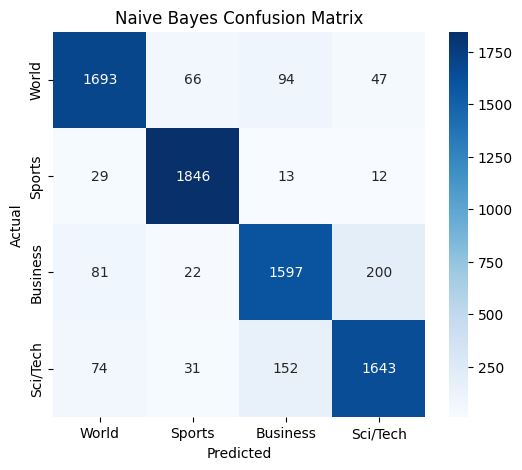

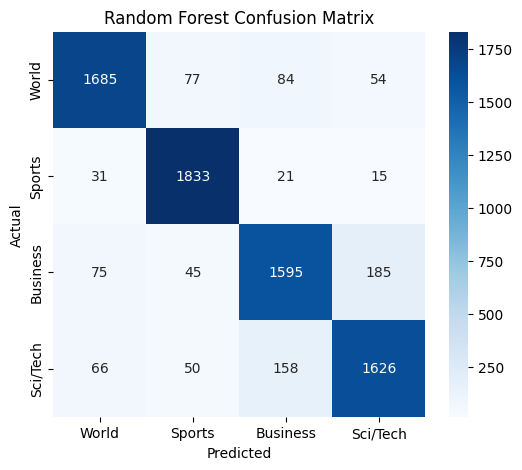

In [10]:
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=list(label_map.values()))
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_map.values(),
                yticklabels=label_map.values())
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# NB confusion matrix
plot_cm(y_test, y_pred_nb, "Naive Bayes Confusion Matrix")

# RF confusion matrix
plot_cm(y_test, y_pred_rf, "Random Forest Confusion Matrix")

Post-Modeling Visualization #1: Most Predictive Word by Class (Naive Bayes)

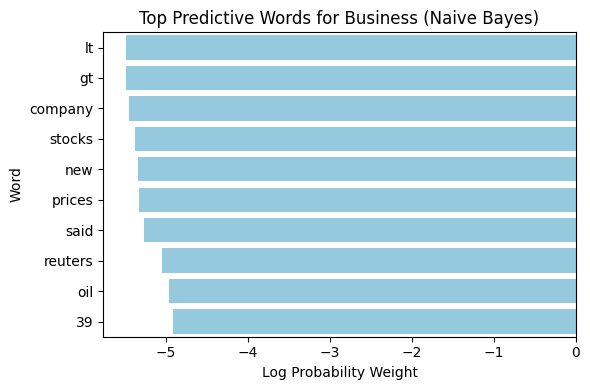

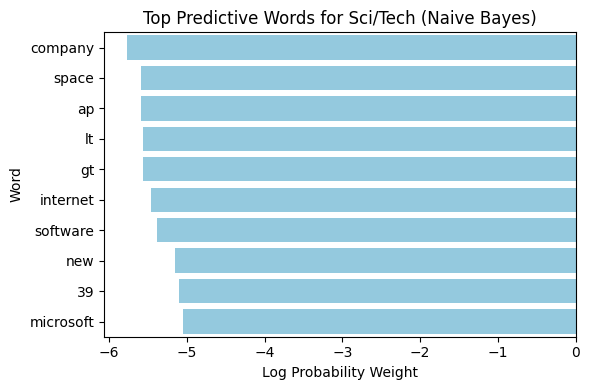

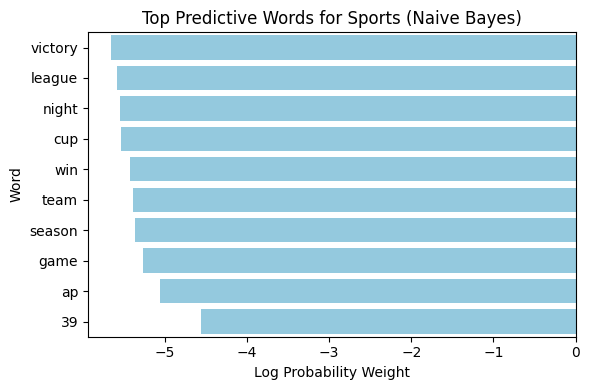

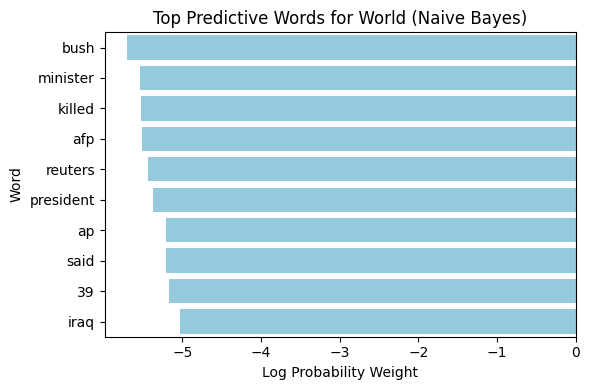

In [14]:
# Plot top 10 words for each class with a single color
for i, class_label in enumerate(class_labels):
    top10_idx = np.argsort(log_probs[i])[-10:]  # top 10 indices
    top10_words = feature_names[top10_idx]
    top10_scores = log_probs[i][top10_idx]

    plt.figure(figsize=(6,4))
    sns.barplot(x=top10_scores, y=top10_words, color="skyblue")  # one color
    plt.title(f"Top Predictive Words for {class_label} (Naive Bayes)")
    plt.xlabel("Log Probability Weight")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()
